### 1. IMPORT ALL NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from matplotlib import style
%matplotlib inline 

### 2. READ/IMPORT THE SONAR DATASET

In [2]:
wine = pd.read_csv(r'C:\Users\PC\OneDrive\Desktop\Dataset\ML Projects\redWine.csv')

### 3. DESCRIPTIVE ANALYSIS: AN INSIGHT INTO THE DATASET
##### A. DISPLAY THE FIRST 5 ROWS

In [3]:
wine[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### B. GET THE SHAPE OF THE DATASET

In [4]:
wine.shape

(1599, 12)

##### C. GET A STATISTICAL OVERVIEW OF THE DATA

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### D. CHECK FOR AND HANDLE MISSING VALUES

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### E. GET DISTINCT VALUES FOR THE QUALITY (COLUMN)

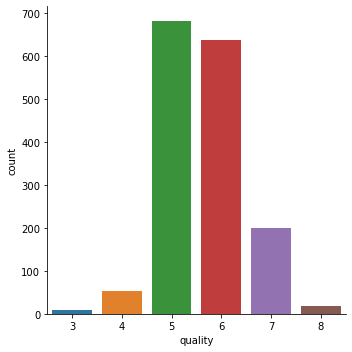

In [7]:
sns.catplot(x='quality', data = wine, kind = 'count')

##### F. VOLATILE ACIDITY VS QUALITY

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

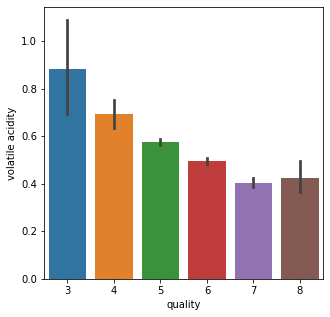

In [8]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine)

##### G. THE STRENGTH OF THE RELATIONSHIP BETWEEN INDIVIDUAL FEATURES

<AxesSubplot:title={'center':'CORRELATION BETWEEN THE FEATURES OF THE DATASET'}>

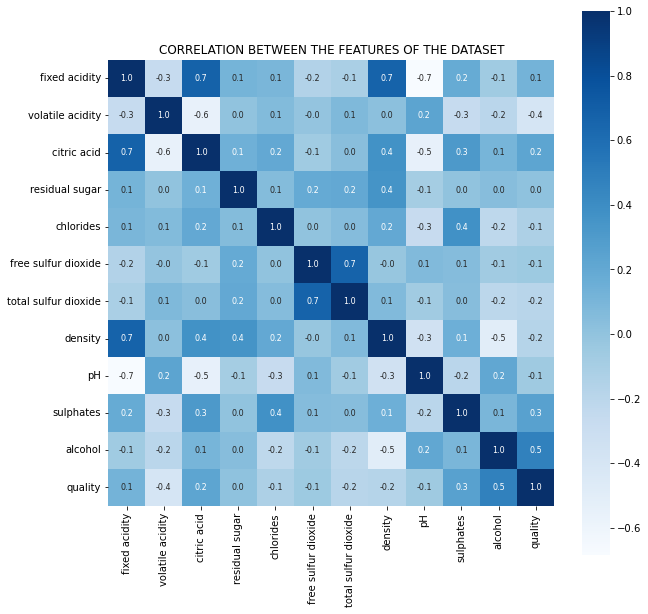

In [9]:
corr_max = wine.corr()
plt.figure(figsize=(10,10))
plt.title('CORRELATION BETWEEN THE FEATURES OF THE DATASET')
sns.heatmap(corr_max, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

### 4. SPLIT THE DATASET INTO FEATURES/DEPENDENT VARIABLES AND TARGET/LABEL VARIABLES

In [10]:
X = wine.drop(columns='quality', axis=1)                         # PUT ALL DATA POINTS EXCEPT THE COLUMN INDEX 60 INTO X
Y = wine['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)       # PUT COLUMN 60 VALUES ONLY INTO Y
print(X)
##print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### 5. SPLITTING THE X & Y DATA POINTS INTO TRAIN & TEST DATA

In [11]:
# X_train = Training Dataset    # X_test = Test Dataset   # Y_train = Labels for X_train    # Y_test = Labels for Y_train
# test_size = The % of X data points that you wanna put as test dataset   
# stratify = ensure near even distribution of labels in the test and the train data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(X_train)
print(X_test)          # N.B. IT WONT BE IN ORDER BECAUSE WE SPLITTED IT RANDOMLY

(1599, 11) (1279, 11) (320, 11)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
468            11.4              0.36         0.69             2.1      0.090   
1595            5.9              0.55         0.10             2.2      0.062   
372             9.1              0.28         0.48             1.8      0.067   
748             7.2              0.50         0.18             2.1      0.071   
1207            9.9              0.72         0.55             1.7      0.136   
...             ...               ...          ...             ...        ...   
299             6.9              0.67         0.06             2.1      0.080   
1558            6.9              0.63         0.33             6.7      0.235   
493             8.7              0.69         0.31             3.0      0.086   
527             7.0              0.38         0.49             2.5      0.097   
1192            7.2              0.25         0.37             2.5      0.063

### 6. TRAIN THE MODEL

##### A. USING RANDOM FOREST

In [12]:
randomFC = RandomForestClassifier()
randomFC.fit(X_train, Y_train)

RandomForestClassifier()

##### B. USING LOGISTIC REGRESSION

In [13]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train, Y_train)

LogisticRegression()

##### C. DECISION TREE

In [14]:
decisonTree = DecisionTreeClassifier()
decisonTree.fit(X_train, Y_train)

DecisionTreeClassifier()

### 7. EVALUATE THE MODEL
##### DISPLAY ACCURACY OF THE MODEL ON BOTH TRAIN & TEST DATASETS

In [17]:
# FOR RANDOM FOREST CLASSIFIER
print('RANDOM FOREST CLASSIFIER')
rfc_train_pred = randomFC.predict(X_train)
rfc_train_acc = accuracy_score(rfc_train_pred, Y_train)
print('MODEL ACCURACY ON THE TRAINING DATA : {:.2f}%'.format(rfc_train_acc * 100))

rfc_test_pred = randomFC.predict(X_test)
rfc_test_acc = accuracy_score(rfc_test_pred, Y_test) 
print('MODEL ACCURACY ON THE TEST DATA : {:.2f}%\n'.format(rfc_test_acc * 100))

# FOR LOGISTIC REGRESSION
print('LOGISTIC REGRESSION')
lg_train_pred = logisticReg.predict(X_train)
lg_train_acc = accuracy_score(lg_train_pred, Y_train)
print('MODEL ACCURACY ON THE TRAIN DATA : {:.2f}%'.format(lg_train_acc * 100))

lg_test_pred = logisticReg.predict(X_test)
lg_test_acc = accuracy_score(lg_test_pred, Y_test)
print('MODEL ACCURACY ON THE TEST DATA : {:.2f}%\n'.format(lg_test_acc * 100))

# FOR DECISION TREE ALGORITHM
print('DECISION TREE')
dt_train_pred = decisonTree.predict(X_train)
dt_train_acc = accuracy_score(dt_train_pred, Y_train)
print('MODEL ACCURACY ON THE TRAIN DATA : {:.2f}%'.format(dt_train_acc * 100))

dt_test_pred = decisonTree.predict(X_test)
dt_test_acc = accuracy_score(dt_test_pred, Y_test)
print('MODEL ACCURACY ON THE TEST DATA : {:.2f}%\n'.format(dt_test_acc * 100))

RANDOM FOREST CLASSIFIER
MODEL ACCURACY ON THE TRAINING DATA : 100.00%
MODEL ACCURACY ON THE TEST DATA : 92.19%

LOGISTIC REGRESSION
MODEL ACCURACY ON THE TRAIN DATA : 87.65%
MODEL ACCURACY ON THE TEST DATA : 88.75%

DECISION TREE
MODEL ACCURACY ON THE TRAIN DATA : 100.00%
MODEL ACCURACY ON THE TEST DATA : 89.38%



THE ACCURACY OF LOGISTIC REGRESSION IS LESS COMPARED TO OTHER METHODS. TRY SCALE THE DATA, IT SHOULD ITS ACCURACY

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       279
           1       0.74      0.61      0.67        41

    accuracy                           0.92       320
   macro avg       0.84      0.79      0.81       320
weighted avg       0.92      0.92      0.92       320

TN:  270
FN:  16
TP:  25
FP:  9


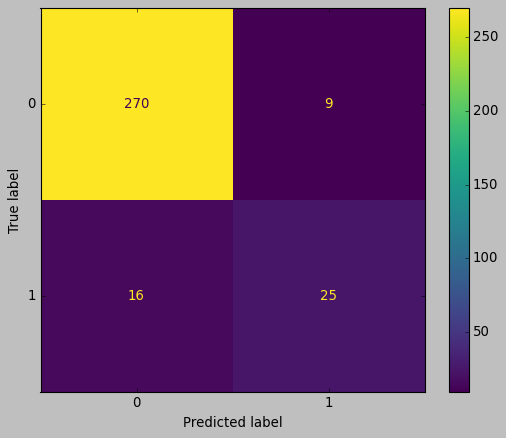

In [18]:
print(classification_report(Y_test, rfc_test_pred))

style.use('classic')
cm = confusion_matrix(Y_test, rfc_test_pred, labels = randomFC.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = randomFC.classes_)
cmd.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       279
           1       0.60      0.37      0.45        41

    accuracy                           0.89       320
   macro avg       0.76      0.67      0.70       320
weighted avg       0.87      0.89      0.88       320

TN:  269
FN:  26
TP:  15
FP:  10


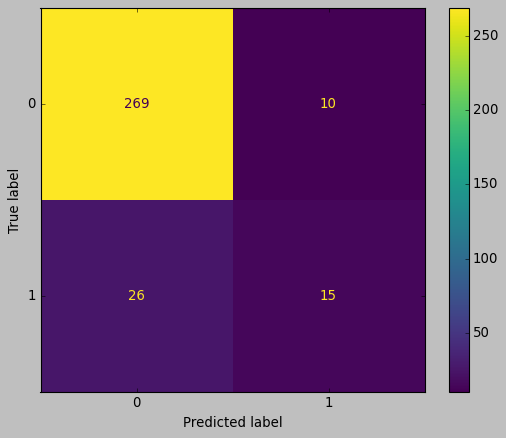

In [19]:
print(classification_report(Y_test, lg_test_pred))

style.use('classic')
cm = confusion_matrix(Y_test, lg_test_pred, labels = logisticReg.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logisticReg.classes_)
cmd.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       279
           1       0.58      0.61      0.60        41

    accuracy                           0.89       320
   macro avg       0.76      0.77      0.77       320
weighted avg       0.90      0.89      0.89       320

TN:  261
FN:  16
TP:  25
FP:  18


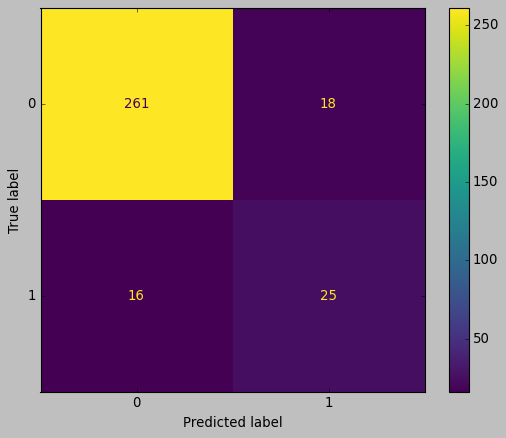

In [20]:
print(classification_report(Y_test, dt_test_pred))  

style.use('classic')
cm = confusion_matrix(Y_test, dt_test_pred, labels = decisonTree.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = decisonTree.classes_)
cmd.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

### 8. PUT THE (PREDICTIVE) MODEL TO TEST
##### A. COPY FROM THE ORIGINAL DATASET MANUALLY TO POPULATE THE INPUT DATA VARIABLE

In [22]:
# GET (A SINGLE ROW WITHOUT THE COLUMN INDEX 8) THIS  FROM THE ORIGINAL DATASET (diabetes.csv)
input_data = (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)

# CHANGE THE INPUT DATA TO A NUMPY ARRAY
input_data_as_numpy_array = np.asarray(input_data)

# RESHAPE THE NUMPY ARRAY AS WE ONLY CONSIDERING A SINGLE INSTANCE (I.E. A SINGLE ROW)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = randomFC.predict(input_data_reshaped)
print('RANDOM FOREST CLASSIFIER')
if (prediction[0] == 0):
  print('THE WINE IS OF LOW QUALITY\n')
else:
  print('THE WINE IS OF HIGH QUALITY\n')


prediction1 = logisticReg.predict(input_data_reshaped)
print('LOGISTIC REGRESSION')
if (prediction1[0] == 0):
  print('THE WINE IS OF LOW QUALITY\n')
else:
  print('THE WINE IS OF HIGH QUALITY\n')


prediction2 = decisonTree.predict(input_data_reshaped)
print('DECISION TREE ALGORITHM')
if (prediction2[0] == 0):
  print('THE WINE IS OF LOW QUALITY\n')
else:
  print('THE WINE IS OF HIGH QUALITY\n')

RANDOM FOREST CLASSIFIER
THE WINE IS OF HIGH QUALITY

LOGISTIC REGRESSION
THE WINE IS OF LOW QUALITY

DECISION TREE ALGORITHM
THE WINE IS OF HIGH QUALITY



##### B. ALTERNATIVE WAY TO FEED INPUT TO OUR MODEL

In [24]:
for index, rows in wine.iterrows():
    
    input_data1 =[]
    
    # CREATE LIST FOR THE CURRENT ROW
    my_list =[rows[:11]]
   
    # APPEND THE LIST TO THE ABOVE INPUT DATA VARIABLE
    input_data1.append(my_list)

    # CHANGE THE INPUT DATA TO A NUMPY ARRAY
    input_data_as_numpy_array = np.asarray(input_data1)
   
    # RESHAPE THE NUMPY ARRAY AS WE ONLY CONSIDERING A SINGLE INSTANCE (I.E. A SINGLE ROW)
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
     
    prediction = randomFC.predict(input_data_reshaped)

    if (prediction[0] == 0):
      print('THE WINE IS OF LOW QUALITY')
    else:
      print('THE WINE IS OF HIGH QUALITY')

THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF HIGH QUALITY
THE WINE IS OF HIGH QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF HIGH QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALITY
THE WINE IS OF LOW QUALIT

##### C. ANOTHER WAY TO SUPPLY INPUT TO OUR MODEL: TAKING ONLY DISTICT VALUE OF pH THAT ONLY HAS 1 OCCURRENCE

In [27]:
X_train['pH'].value_counts()

3.30    51
3.36    44
3.38    41
3.26    38
3.29    37
        ..
4.01     1
2.90     1
3.74     1
2.87     1
2.95     1
Name: pH, Length: 87, dtype: int64

In [26]:
sample_data = X_train.loc[X_train['pH'] == 4.01]
prediction = randomFC.predict(sample_data)

if (prediction[0] == 0):
    print('THE WINE IS OF LOW QUALITY')
else:
    print('THE WINE IS OF HIGH QUALITY')

THE WINE IS OF LOW QUALITY
